<a href="https://colab.research.google.com/github/01fe21bec087/Python_for_ML/blob/main/Linear_Regression_Univariable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Using Scikit learn***

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

df=pd.read_csv('/content/drive/MyDrive/ML using Python/Homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


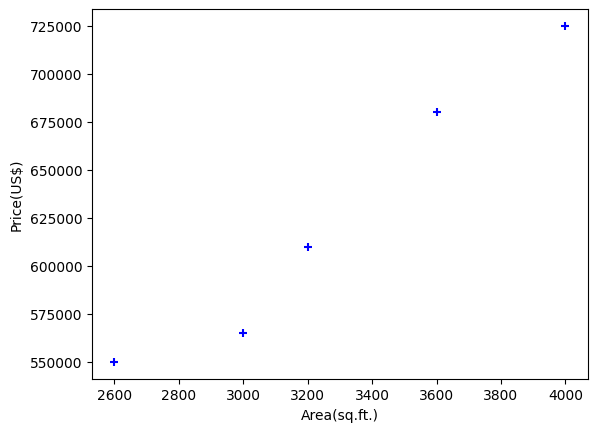

In [4]:
#Plotting Training values
#%matplotlib.inline
plt.xlabel('Area(sq.ft.)')
plt.ylabel('Price(US$)')
plt.scatter(df.area,df.price,color='blue',marker='+')

In [5]:
reg=linear_model.LinearRegression()
reg.fit(df[['area']],df.price)

LinearRegression()

In [6]:
reg.predict([[3300]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [7]:
reg.coef_
#m

array([135.78767123])

In [8]:
reg.intercept_
#b

180616.43835616432

In [9]:
#y=m*x+b
#for x=3300
y1=135.78767123*3300+180616.43835616432
print(y1)

628715.7534151643


In [10]:
d=pd.read_csv('/content/drive/MyDrive/ML using Python/area.csv')
d.head(3)

,area
0,1000
1,1500
2,2300


In [11]:
p=reg.predict(d)
print(p)

[ 316404.10958904  384297.94520548  492928.08219178  661304.79452055
  740061.64383562  799808.21917808  926090.75342466  650441.78082192
  825607.87671233  492928.08219178 1402705.47945205 1348390.4109589
 1144708.90410959]


In [12]:
d['price']=p
d.to_csv('/content/drive/MyDrive/ML using Python/LinReg_areas.csv',index=False)

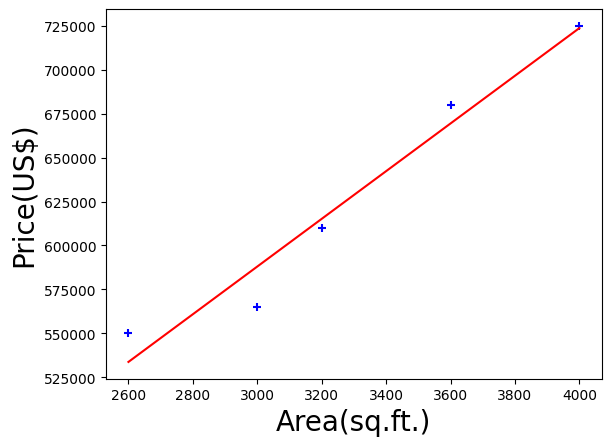

In [18]:
plt.xlabel('Area(sq.ft.)',fontsize=20)
plt.ylabel('Price(US$)',fontsize=20)
plt.scatter(df.area,df.price,color='blue',marker='+')
plt.plot(df.area,reg.predict(df[['area']]),color='red')

***Plotting test values***

In [18]:
testval=pd.read_csv('/content/drive/MyDrive/ML using Python/LinReg_areas.csv')
testval

,area,price
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


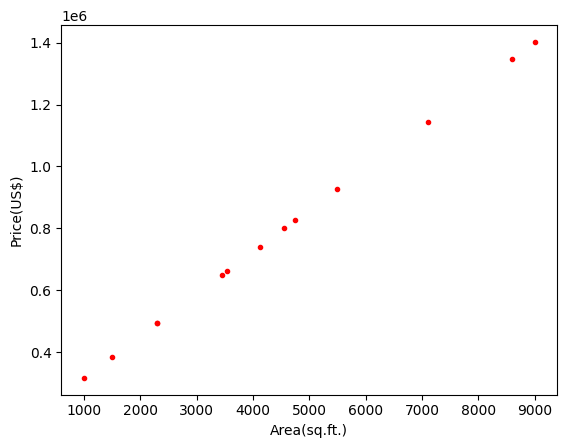

In [14]:
plt.xlabel('Area(sq.ft.)')
plt.ylabel('Price(US$)')
plt.scatter(testval.area,testval.price,color='red',marker='.')

# ***Using Gradient Descent Algorithm***

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

train=pd.read_csv('/content/drive/MyDrive/ML using Python/Homeprices.csv')
train

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


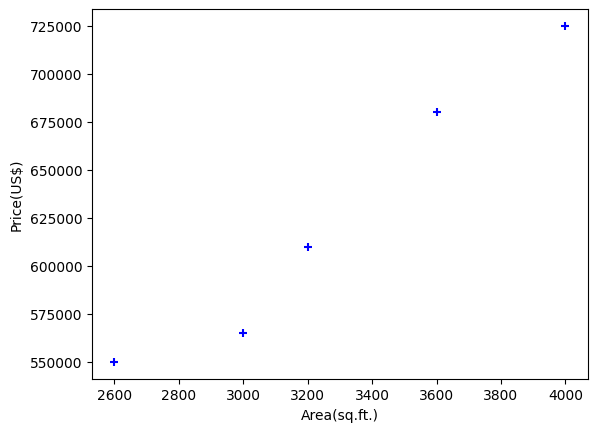

In [27]:
#Plotting Training values
plt.xlabel('Area(sq.ft.)')
plt.ylabel('Price(US$)')
plt.scatter(train.area,train.price,color='blue',marker='+')

In [44]:
# x is area
# y is price
#m=5 for the given .csv file
m=5

def hypothesis(xi,b,w1):
  hwi=w1*xi+b
  return hwi

def sum1(b,w1):
  s1=0
  for j in range(m):
    xi=train.area[j]
    yi=train.price[j]
    s1+=hypothesis(xi,b,w1)-yi
  return s1

def sum2(b,w1):
  s2=0
  for k in range(m):
    xi=train.area[k]
    yi=train.price[k]
    s2+=(hypothesis(xi,b,w1)-yi)*xi
  return s2

#m=5
b=0
w1=0
a=0.00000001 #1/m -- learning rate
for i in range(1000):
  btemp=b-(a*sum1(b,w1))/m
  w1temp=w1-(a*sum2(b,w1))/m
  b=btemp
  w1=w1temp

#parameter()
print("b =",b)
print("w1 =",w1)
print()
print("The linear Regression model is: y_=w1*x+b")
print("y_ =",w1,"*x +",b)
#for testing replace xi by testval of area
#y_=hypothesis(xi,b,w1)

print()
y_=hypothesis(4000,b,w1)
print("for x = 4000, y_ =",y_)

b = 0.09498556255653949
w1 = 189.6833778741573

The linear Regression model is: y_=w1*x+b
y_ = 189.6833778741573 *x + 0.09498556255653949

for x = 4000, y_ = 758733.6064821917


In [39]:
test=pd.read_csv('/content/drive/MyDrive/ML using Python/area.csv')
test

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


<function matplotlib.pyplot.show(close=None, block=None)>

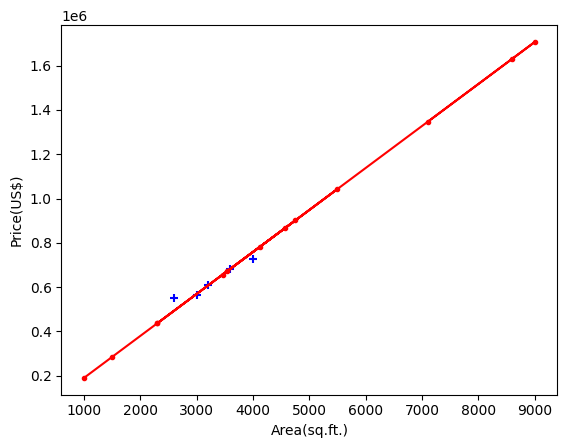

In [40]:
#Plotting Training values
plt.xlabel('Area(sq.ft.)')
plt.ylabel('Price(US$)')
plt.scatter(train.area,train.price,color='blue',marker='+')

#Plotting test values
plt.plot(test.area,hypothesis(test.area,b,w1),color='red',marker='.')
plt.show

In [47]:
test_val=hypothesis(test.area,b,w1)
test_val

0     1.896835e+05
1     2.845252e+05
2     4.362719e+05
3     6.714793e+05
4     7.814956e+05
5     8.649563e+05
6     1.041362e+06
7     6.563046e+05
8     9.009961e+05
9     4.362719e+05
10    1.707150e+06
11    1.631277e+06
12    1.346752e+06
Name: area, dtype: float64

In [49]:
test['price']=test_val
test.to_csv('/content/drive/MyDrive/ML using Python/Test_val_GD_LinearReg_Areas.csv',index=False)